In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\SQL projects\Customer Churn Analysis Project\telco_customer_churn.csv")



In [2]:
# Basic Data Cleaning
# Check shape and preview
print("Shape of dataset:", df.shape)
df.head()

# Check for null values
print("\nNull values per column:")
print(df.isnull().sum())

# Check data types
df.info()

# Convert 'TotalCharges' to numeric (it may have strings due to missing or invalid entries)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Re-check nulls
print("\nNulls after conversion:")
print(df.isnull().sum())

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Reset index
df.reset_index(drop=True, inplace=True)


Shape of dataset: (7043, 21)

Null values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-nul

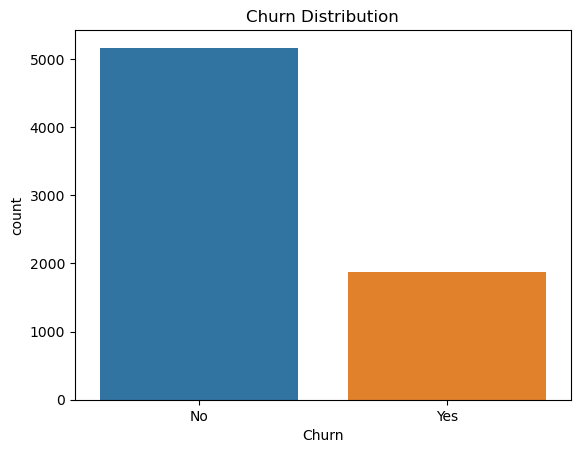

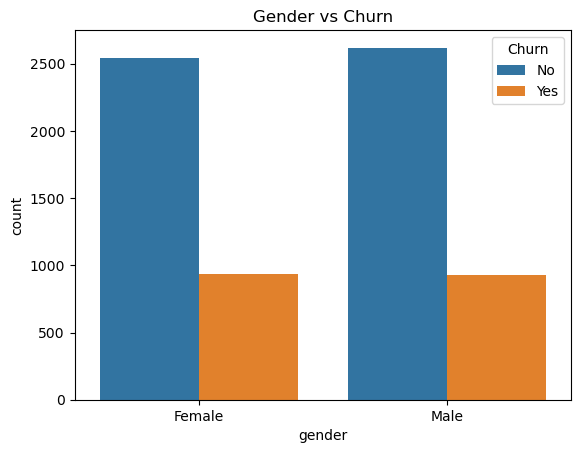

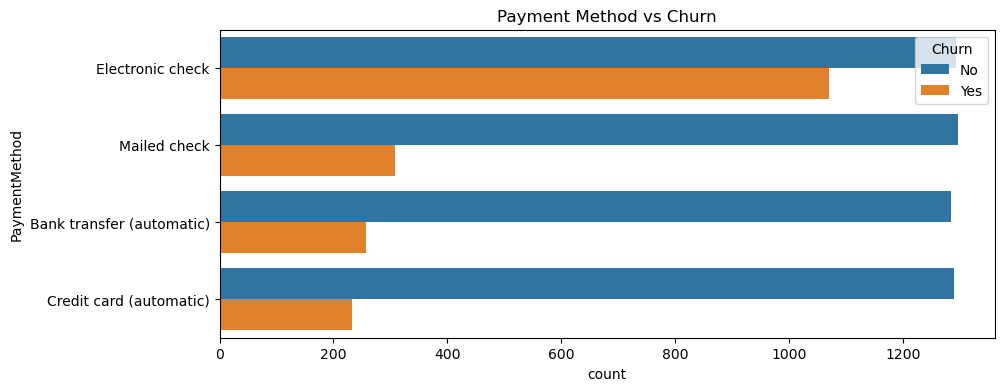

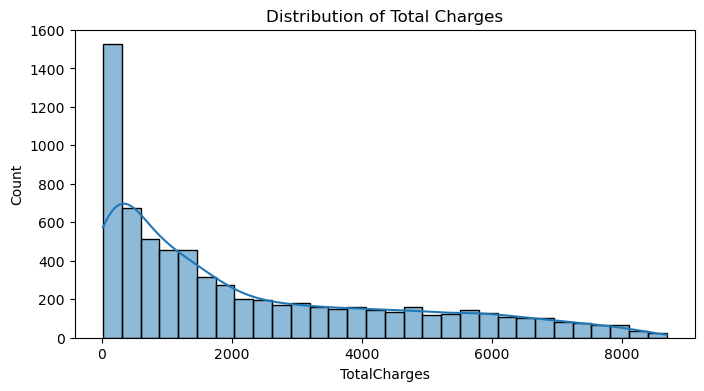

In [3]:
# Basic EDA (Univariate Analysis)

# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Gender distribution
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender vs Churn')
plt.show()

# Payment Method
plt.figure(figsize=(10,4))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.title('Payment Method vs Churn')
plt.show()

# Histogram for Total Charges
plt.figure(figsize=(8,4))
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Distribution of Total Charges')
plt.show()


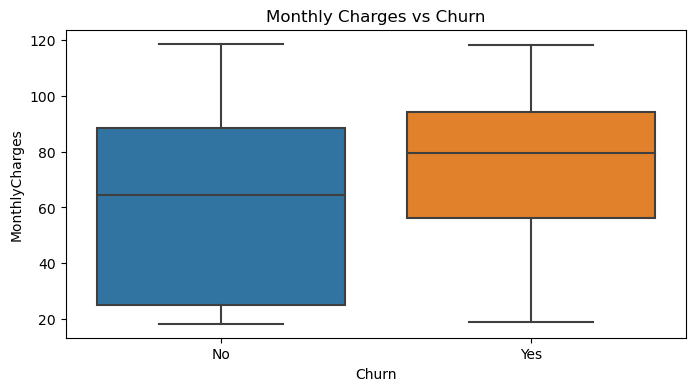

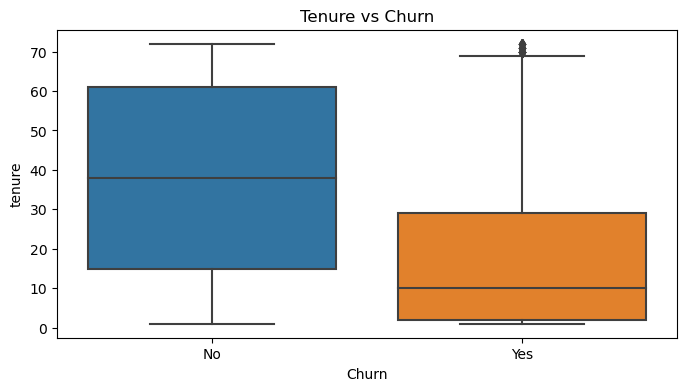

In [4]:
# Bivariate Analysis (Initial Trends

# Monthly Charges vs Churn
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.show()


In [5]:
# Summary of Key Columns

# Summary statistics
df.describe()

# Churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):\n", churn_rate)


Churn Rate (%):
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [6]:
df.to_csv('cleaned_telco_data.csv', index=False)


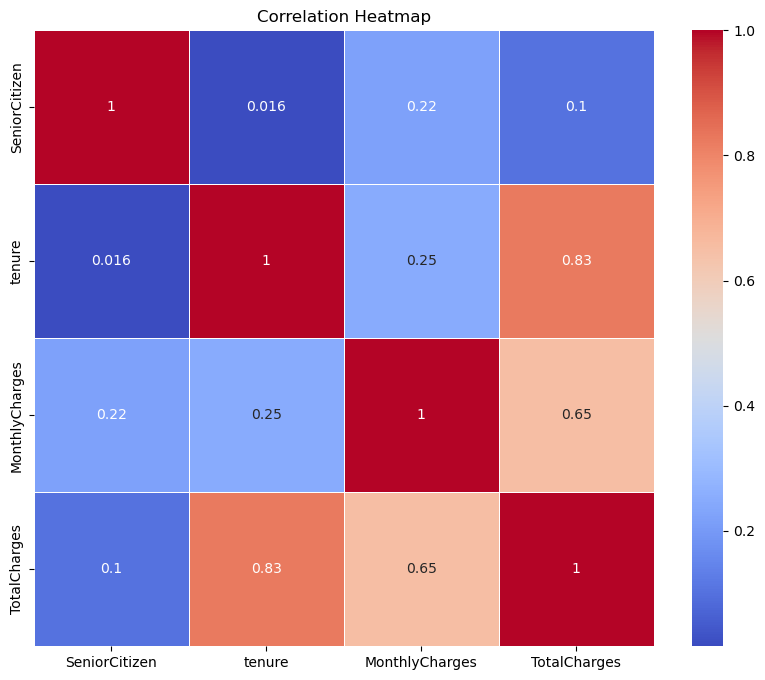

In [8]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


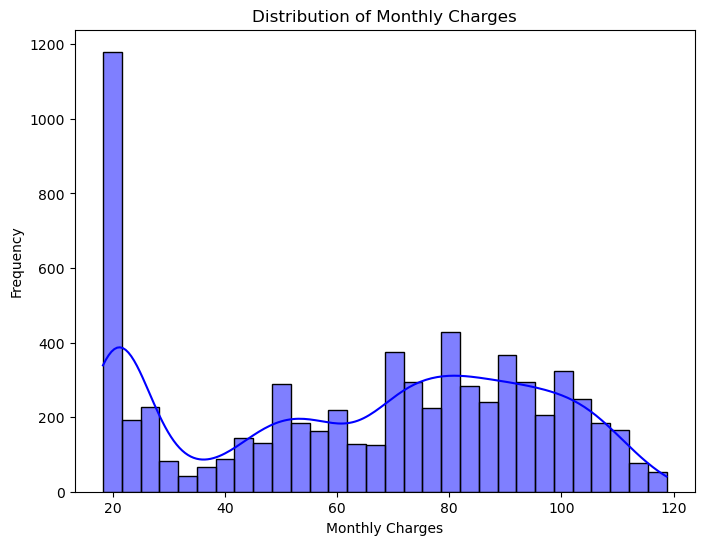

In [9]:
## Histogram of a Numeric Column

plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()
